# Problem Statement : Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.


# Task Completed By : Adarsh Poojary 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
accidents_df = pd.read_csv('C:/Users/Adarsh Poojary/PRODIGY_DS_05/accidents.csv')

In [11]:
accidents_df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [12]:
accidents_df

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding
...,...,...,...,...,...,...,...
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving


In [13]:
weather_accidents = accidents_df.groupby('WeatherCondition')['Deaths'].sum().reset_index()
road_condition_accidents = accidents_df.groupby('RoadCondition')['Deaths'].sum().reset_index()
time_of_day_accidents = accidents_df.groupby('Timing')['Deaths'].sum().reset_index()

In [14]:
weather_accidents

,WeatherCondition,Deaths
0,Clear,83102
1,Foggy,83519
2,Rainy,82531


In [15]:
road_condition_accidents

,RoadCondition,Deaths
0,Fine,83287
1,Rough,82498
2,Under Construction,83367


In [16]:
 time_of_day_accidents

,Timing,Deaths
0,Afternoon,63077
1,Evening,41468
2,Morning,61996
3,Night,82611


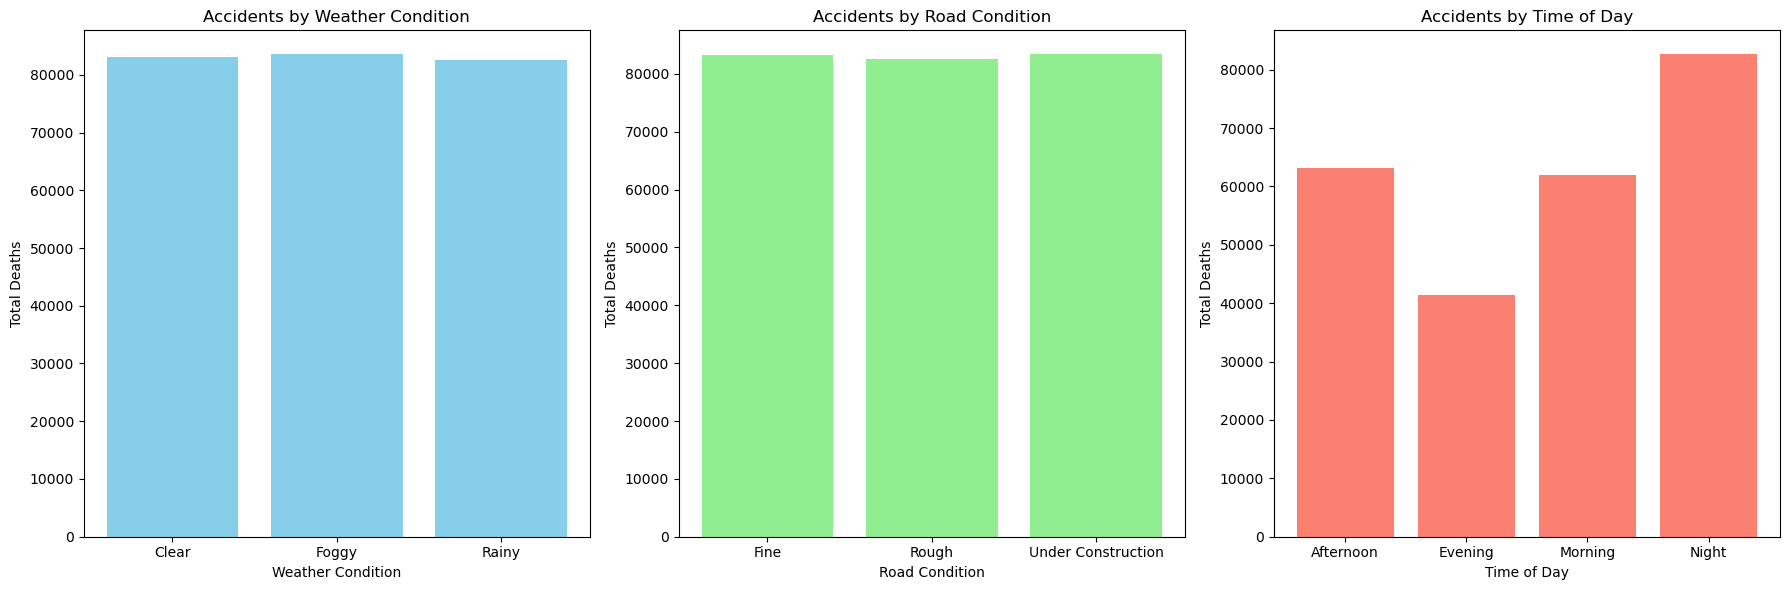

In [28]:
#Visualize these patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot for Weather Conditions
axes[0].bar(weather_accidents['WeatherCondition'], weather_accidents['Deaths'], color='skyblue')
axes[0].set_title('Accidents by Weather Condition')
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Total Deaths')

# Plot for Road Conditions
axes[1].bar(road_condition_accidents['RoadCondition'], road_condition_accidents['Deaths'], color='lightgreen')
axes[1].set_title('Accidents by Road Condition')
axes[1].set_xlabel('Road Condition')
axes[1].set_ylabel('Total Deaths')

# Plot for Time of Day
axes[2].bar(time_of_day_accidents['Timing'], time_of_day_accidents['Deaths'], color='salmon')
axes[2].set_title('Accidents by Time of Day')
axes[2].set_xlabel('Time of Day')
axes[2].set_ylabel('Total Deaths')

# Display the plots
plt.tight_layout()
plt.show()


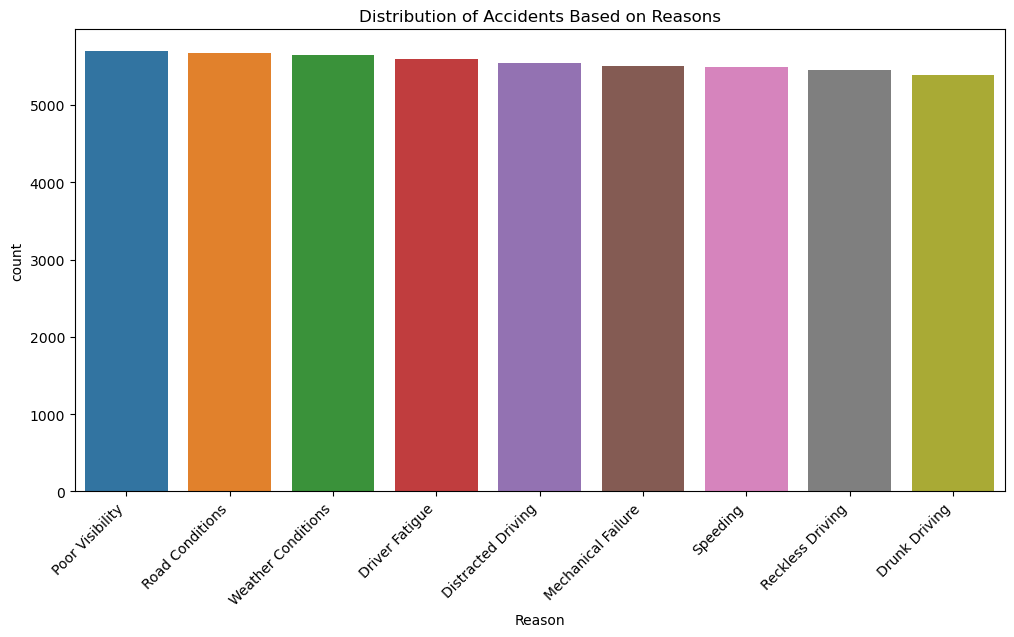

In [33]:
# Explore the reasons for accidents
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=accidents_df, order=accidents_df['Reason'].value_counts().index)
plt.title("Distribution of Accidents Based on Reasons")
plt.xticks(rotation=45, ha="right")
plt.show()

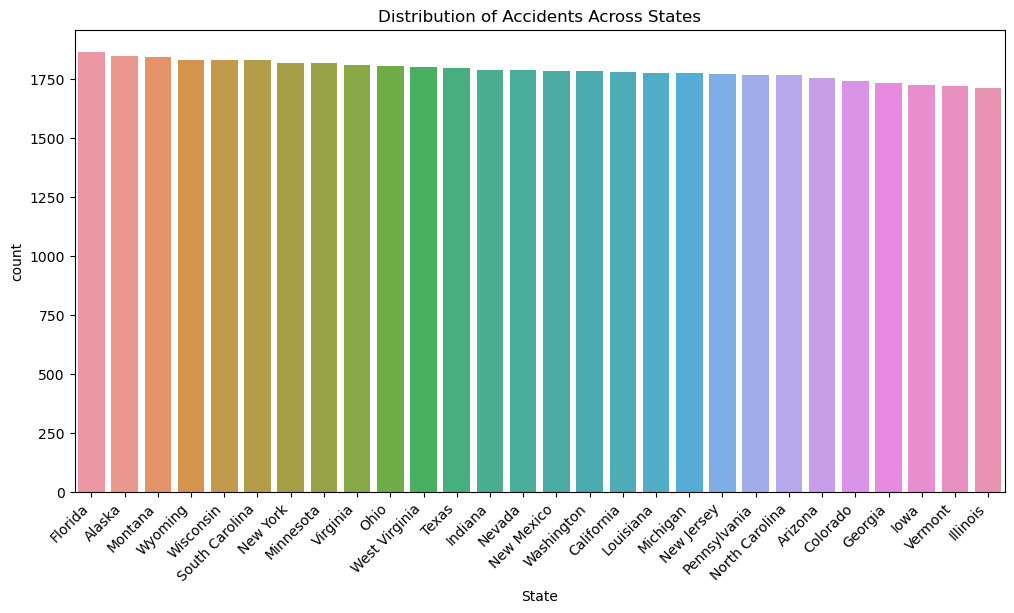

In [35]:
# Explore the distribution of accidents across different states
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=accidents_df, order=accidents_df['State'].value_counts().index)
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

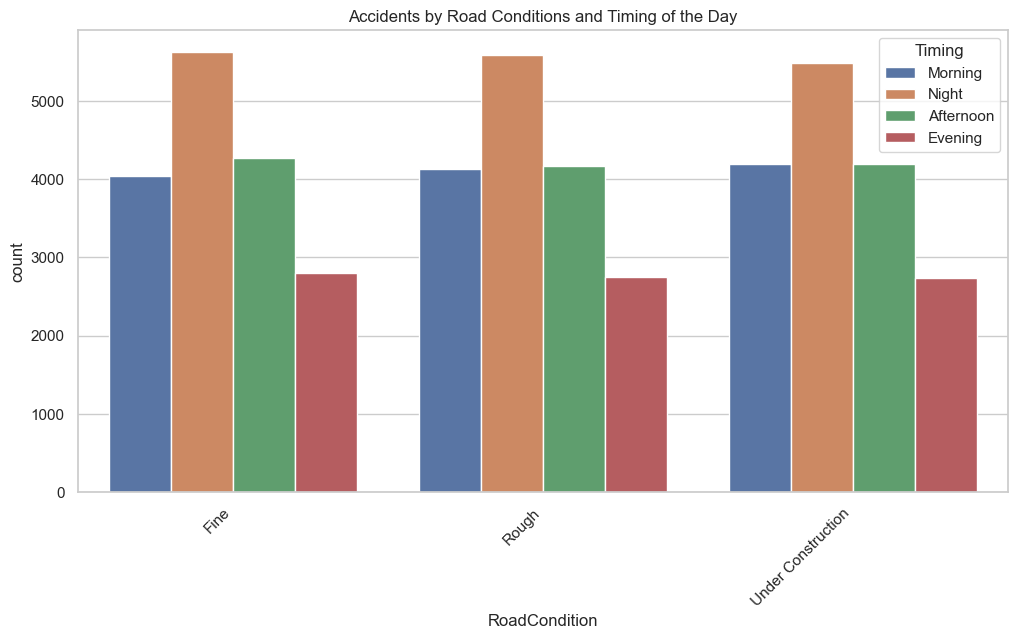

In [38]:
sns.set(style="whitegrid")

# Explore patterns related to road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=accidents_df, order=accidents_df['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

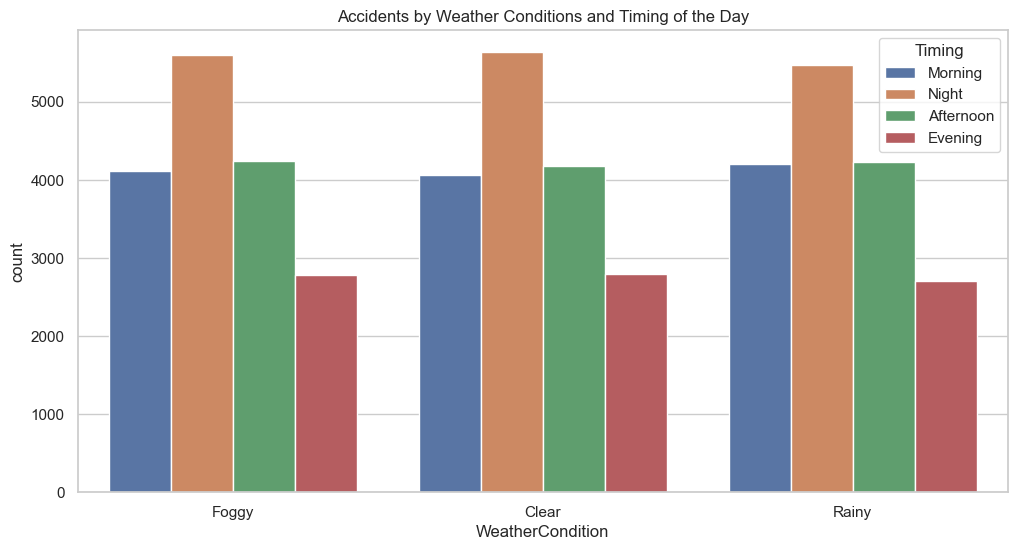

In [40]:
# Explore patterns related to weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=accidents_df, order=accidents_df['WeatherCondition'].value_counts().index)
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

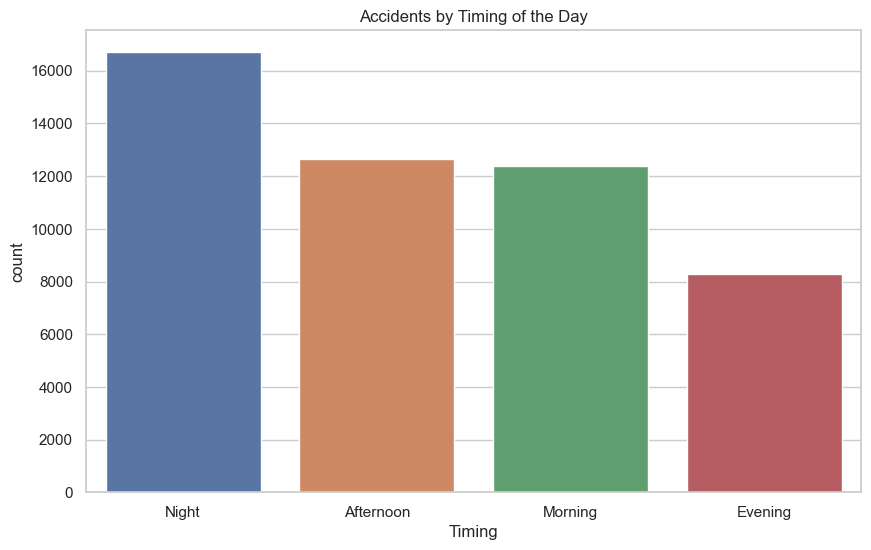

In [42]:
# Explore patterns related to time of day
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=accidents_df, order=accidents_df['Timing'].value_counts().index)
plt.title("Accidents by Timing of the Day")
plt.show()

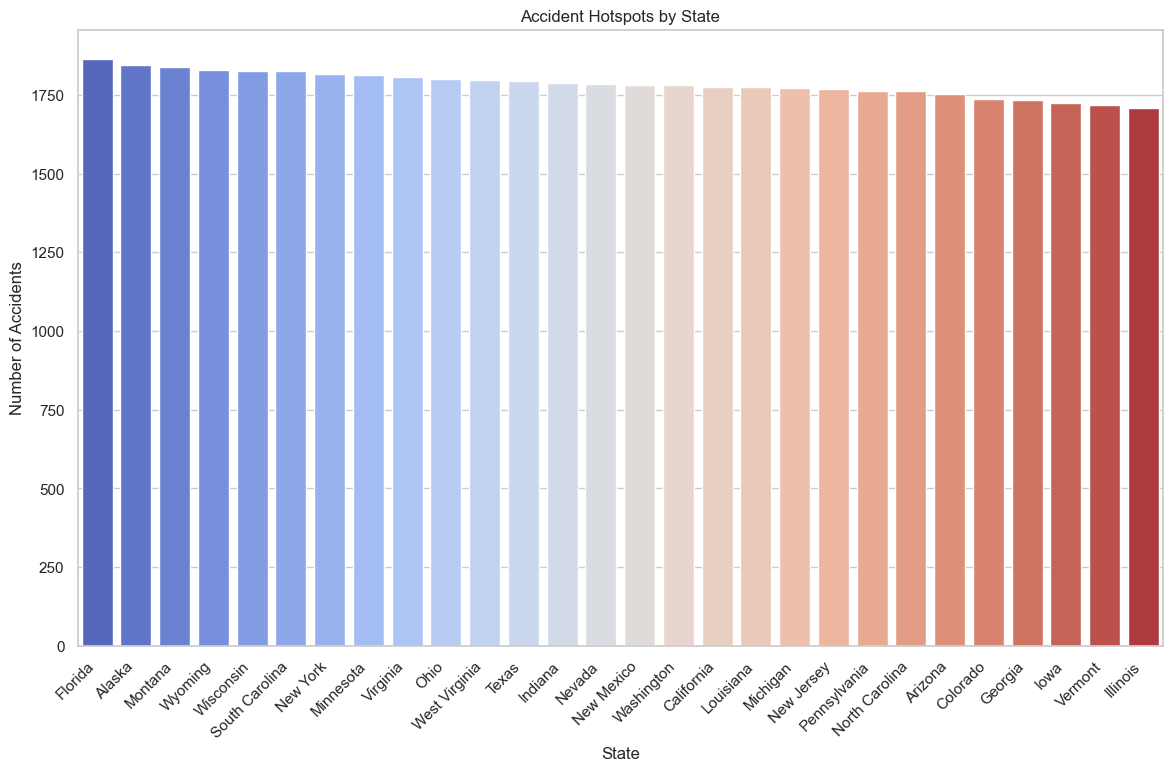

In [45]:
sns.set(style="whitegrid")

# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 8))
state_accidents = accidents_df['State'].value_counts()

# Change color palette to 'coolwarm'
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="coolwarm")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

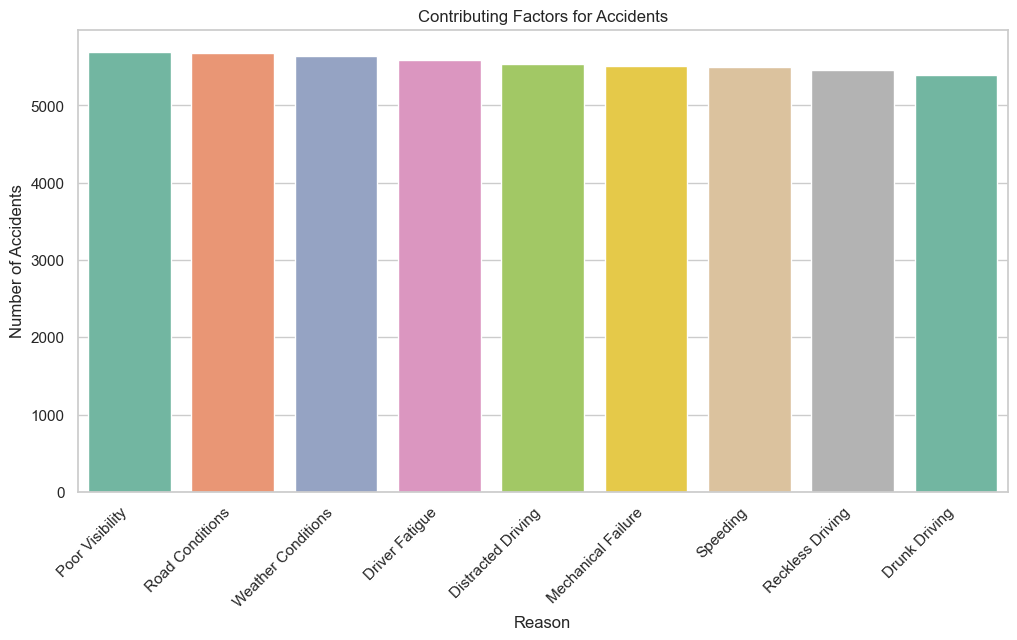

In [47]:
# Visualize contributing factors (Reasons for accidents)
plt.figure(figsize=(12, 6))
reasons_accidents = accidents_df['Reason'].value_counts()

# Change color palette to 'Set2'
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="Set2")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4000x800 with 0 Axes>

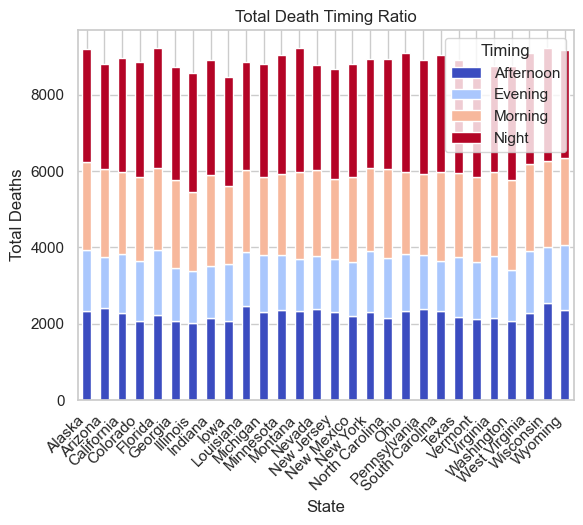

In [49]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = accidents_df.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio with a new color palette
plt.figure(figsize=(40, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="coolwarm")  # Change colormap here
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()